# LASSOの問題点を検証
- 変数選択数の限界
- 説明変数間の相関があるときの問題

参考：https://stats.biopapyrus.jp/sparse-modeling/lasso.html

## 1. 変数選択数の限界
データのサンプル数が$n$, 変数の数が$p$で$p > n$の場合, 高々$n$個の変数までしか選択できない

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# データ数
n_samples = 100
# 真の変数の数
n_true_features = 150
# 全体の変数の数
n_features = 300

In [3]:
beta = np.zeros((n_features+1))
beta[:n_true_features] = np.random.randn(n_true_features)
X = np.ones((n_samples, n_features+1))
X[:, 1:] = np.random.randn(n_samples, n_features)
y = X @ beta + np.random.randn(n_samples)

In [4]:
print(X.shape)
print(beta.shape)
print(y.shape)

(100, 301)
(301,)
(100,)


In [5]:
class Lasso:
    def __init__(self, alpha=0.1, maxiter=100):
        self.alpha = alpha
        self.maxiter = maxiter
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        L = 2*np.linalg.eig(X.T@X)[0].max() 
        z = self.w
        s = 1
        for i in range(self.maxiter):
            res = y - X @ z
            v = z + (X.T @ res) / L
            w_new = self._soft_threshold(v,  self.alpha / L)
            s_new  = (1 + np.sqrt(1 + 4 * s ** 2)) / 2
            z = self.w + (s - 1) / s_new * (w_new - self.w)
            
            self.w = w_new
            s = s_new
    
    def predict(self, X):
        return X @ self.w
        
    def _soft_threshold(self, y, alpha):
        return np.sign(y) * np.maximum(np.abs(y) - alpha, 0.0)

In [6]:
model = Lasso(maxiter=100000)
model.fit(X, y)

/Users/habakan/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


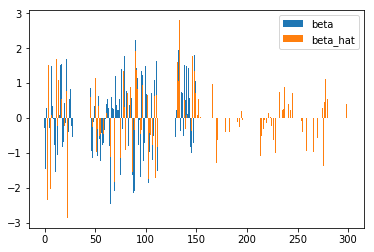

In [7]:
left = np.array([ i for i in range(len(beta)) ] )
plt.figure()
plt.bar(left, beta, label="beta")
plt.bar(left, model.w, label="beta_hat")
plt.legend()
plt.show()

### 非ゼロの係数の数
特徴選択された数

In [8]:
# 非ゼロの係数の数
np.sum(np.abs(model.w) > 0.01, axis=0)

119